In [1]:
import numpy as np
from networkx import nx
import matplotlib.pyplot as plt
from matplotlib import rc
import scipy
import pandas as pd
import random
import timeit
import tqdm
import seaborn as sns
random_seed=43

Part 1

In [2]:
graph = nx.generators.random_graphs.gnm_random_graph(n=100, m=500, seed=random_seed)
for (u, v) in graph.edges():
        graph.edges[u, v]["weight"] = np.random.randint(1, 100)

In [3]:
adjacency_matrix=nx.to_numpy_matrix(graph)
for row in adjacency_matrix[:2]:
    print(row)

[[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  73.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  9.  0.  0. 84.  0.
   0.  0. 39.  0.  0.  0.  0.  0.  0. 84.  0.  0.  0.  0.  0.  0. 25.  0.
   0. 36.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]]
[[ 0.  0.  0.  0.  0. 80.  0. 85.  0.  0.  0.  0.  0. 39. 52.  0.  0.  0.
   0.  0.  0. 51.  0.  0.  0.  0.  0.  0.  1.  0. 26.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. 42.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. 32.  0.  0.  0.  0.  0.
  18.  0.  0. 17.  0.  0. 46.  0.  0. 29.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]]


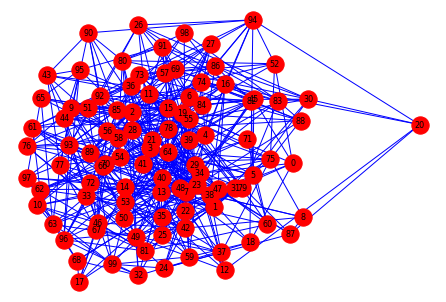

In [4]:
nx.draw_spring(graph,  with_labels=True, node_color='red', width=1, edge_color='blue', font_size=8)


In [5]:
#random starting vertex
vertex=random.randint(0, 99)
print("Vertex:",vertex)

Vertex: 42


In [6]:
def dijkstra_time(graph, start_v):
    data = []
    for end_v in list(graph.nodes):
        t = timeit.timeit(stmt=f"nx.single_source_dijkstra(graph, {start_v}, {end_v})", globals=globals(), number=10)
        length, path = nx.single_source_dijkstra(graph, start_v, end_v)
        data.append({"vertices": [start_v, end_v], "path_dijkstra": path, "path_len_dijkstra": length, "time_dijkstra": t})
    return data

In [7]:
DT= pd.DataFrame(dijkstra_time(graph, vertex))
DT

,vertices,path_dijkstra,path_len_dijkstra,time_dijkstra
0,"[42, 0]","[42, 14, 5, 31, 0]",62,0.006464
1,"[42, 1]","[42, 14, 61, 54, 44, 28, 1]",40,0.002135
2,"[42, 2]","[42, 14, 83, 98, 2]",41,0.002387
3,"[42, 3]","[42, 14, 5, 3]",34,0.001390
4,"[42, 4]","[42, 14, 61, 54, 44, 4]",48,0.003712
...,...,...,...,...
95,"[42, 95]","[42, 33, 96, 95]",41,0.002147
96,"[42, 96]","[42, 33, 96]",39,0.001538
97,"[42, 97]","[42, 14, 61, 54, 92, 48, 97]",72,0.004769
98,"[42, 98]","[42, 14, 83, 98]",31,0.000943


In [8]:
def bf_time(graph,start_v):
    data = []
    for end_v in list(graph.nodes):
        t = timeit.timeit(stmt=f"nx.single_source_bellman_ford(graph, {start_v}, {end_v})", globals=globals(), number=10)
        length,path = nx.single_source_bellman_ford(graph, start_v, end_v)
        data.append({"vertices": [start_v, end_v], "path_bf": path, "path_len_bf": length, "time_bf": t})
    return data

In [9]:
TBF=pd.DataFrame(bf_time(graph,vertex))
TBF

,vertices,path_bf,path_len_bf,time_bf
0,"[42, 0]","[42, 14, 5, 31, 0]",62,0.018328
1,"[42, 1]","[42, 14, 61, 54, 44, 28, 1]",40,0.015358
2,"[42, 2]","[42, 14, 83, 98, 2]",41,0.015475
3,"[42, 3]","[42, 14, 5, 3]",34,0.015882
4,"[42, 4]","[42, 14, 61, 54, 44, 4]",48,0.016957
...,...,...,...,...
95,"[42, 95]","[42, 33, 96, 95]",41,0.013856
96,"[42, 96]","[42, 33, 96]",39,0.013878
97,"[42, 97]","[42, 14, 61, 54, 92, 48, 97]",72,0.013926
98,"[42, 98]","[42, 14, 83, 98]",31,0.014272


In [10]:
compare = DT.join(TBF.drop(['vertices'],axis=1))
compare.head(10)

,vertices,path_dijkstra,path_len_dijkstra,time_dijkstra,path_bf,path_len_bf,time_bf
0,"[42, 0]","[42, 14, 5, 31, 0]",62,0.006464,"[42, 14, 5, 31, 0]",62,0.018328
1,"[42, 1]","[42, 14, 61, 54, 44, 28, 1]",40,0.002135,"[42, 14, 61, 54, 44, 28, 1]",40,0.015358
2,"[42, 2]","[42, 14, 83, 98, 2]",41,0.002387,"[42, 14, 83, 98, 2]",41,0.015475
3,"[42, 3]","[42, 14, 5, 3]",34,0.001390,"[42, 14, 5, 3]",34,0.015882
4,"[42, 4]","[42, 14, 61, 54, 44, 4]",48,0.003712,"[42, 14, 61, 54, 44, 4]",48,0.016957
...,...,...,...,...,...,...,...
95,"[42, 95]","[42, 33, 96, 95]",41,0.002147,"[42, 33, 96, 95]",41,0.013856
96,"[42, 96]","[42, 33, 96]",39,0.001538,"[42, 33, 96]",39,0.013878
97,"[42, 97]","[42, 14, 61, 54, 92, 48, 97]",72,0.004769,"[42, 14, 61, 54, 92, 48, 97]",72,0.013926
98,"[42, 98]","[42, 14, 83, 98]",31,0.000943,"[42, 14, 83, 98]",31,0.014272


In [11]:
#as we can see, not all the paths are equal from both algorithms,
#though they have the same length
compare[~compare['path_dijkstra'].eq(compare['path_bf'])].drop(['time_dijkstra','time_bf'],axis=1)

,vertices,path_dijkstra,path_len_dijkstra,path_bf,path_len_bf
93,"[42, 93]","[42, 14, 83, 98, 2, 56, 93]",58,"[42, 14, 61, 54, 92, 93]",58


In [12]:
compare[['vertices','time_dijkstra','time_bf']]

,vertices,time_dijkstra,time_bf
0,"[42, 0]",0.006464,0.018328
1,"[42, 1]",0.002135,0.015358
2,"[42, 2]",0.002387,0.015475
3,"[42, 3]",0.001390,0.015882
4,"[42, 4]",0.003712,0.016957
...,...,...,...
95,"[42, 95]",0.002147,0.013856
96,"[42, 96]",0.001538,0.013878
97,"[42, 97]",0.004769,0.013926
98,"[42, 98]",0.000943,0.014272


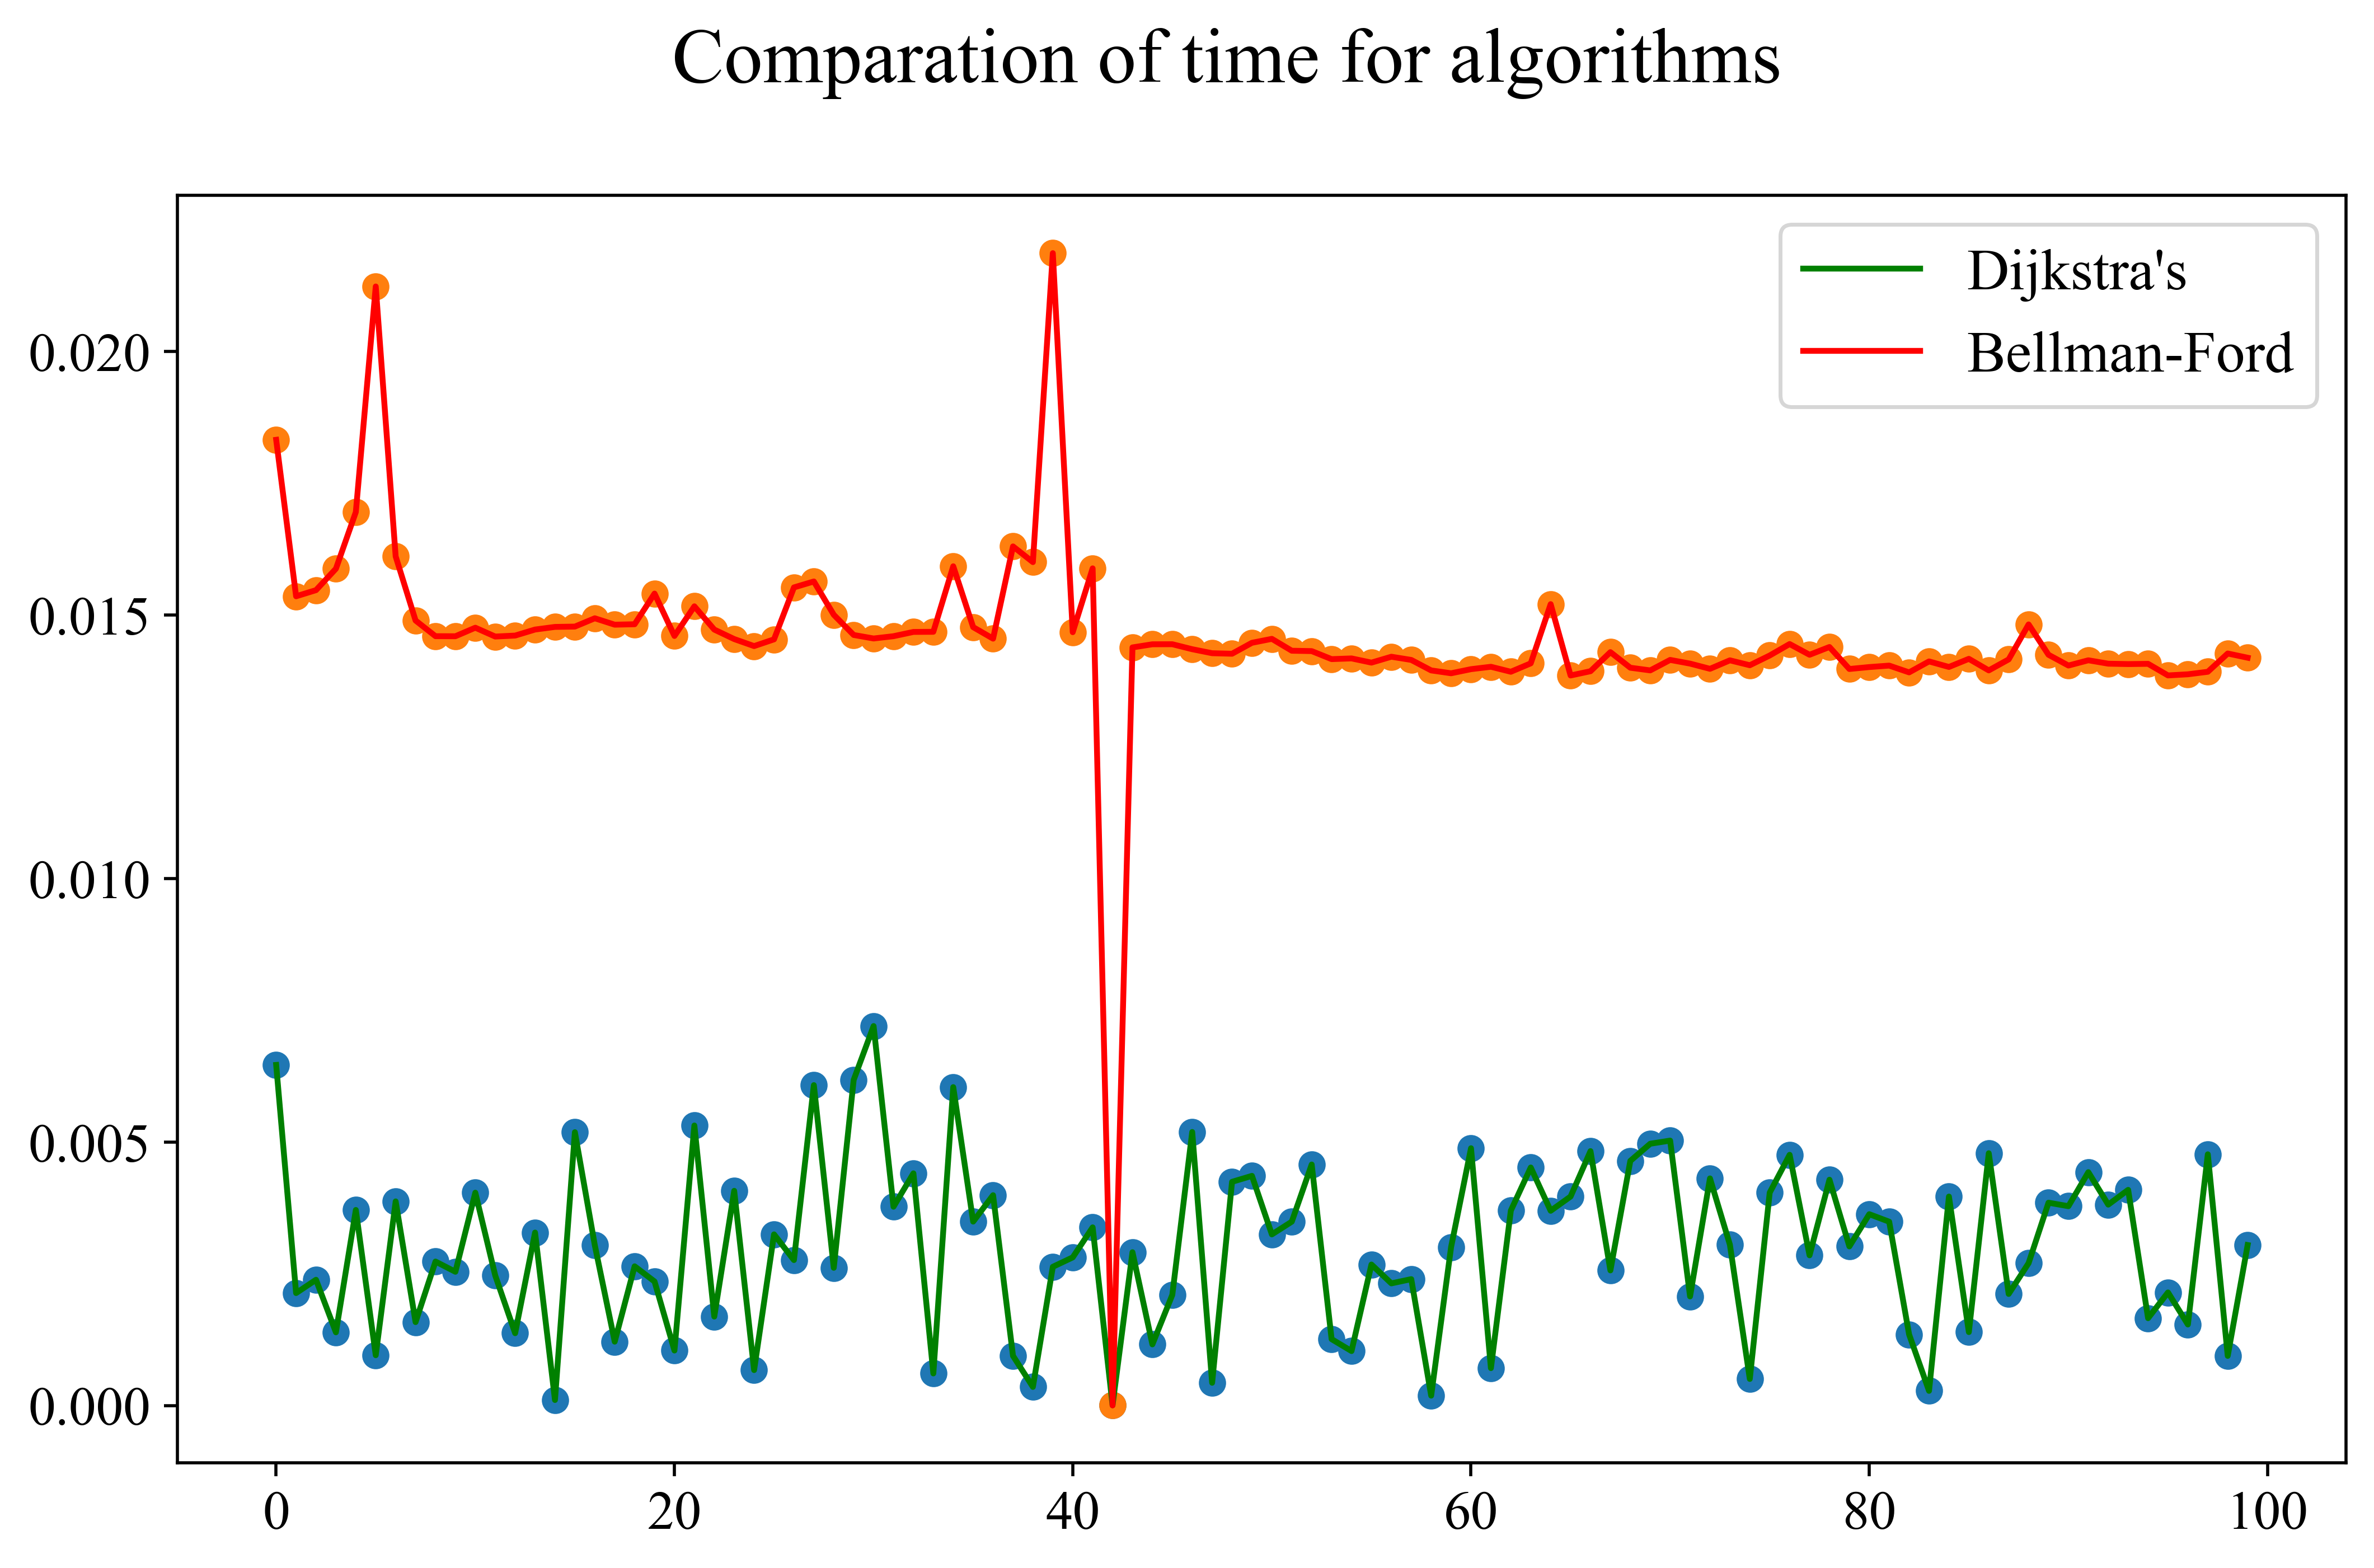

In [13]:
plt.rcParams["figure.figsize"] = (10, 6)
rc('font', family='serif', serif='Times New Roman')
plt.figure(dpi=500)
x=np.arange(100)
plt.scatter(x, compare[['time_dijkstra']])
plt.scatter(x, compare [['time_bf']])
plt.plot(x, compare[['time_dijkstra']], c='green', label='Dijkstra\'s')
plt.plot(x, compare[['time_bf']], c='red', label='Bellman-Ford')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(loc='best',fontsize=15)
plt.suptitle('Comparation of time for algorithms', fontsize=20)
plt.savefig(fname='Comparation of time.png', format='png')




Part 2

In [14]:
#generation coordinates for obstacle cells
def gen_coordinates(m, n):
    seen = set()
    x, y = np.random.randint(m, n), np.random.randint(m, n)
    while True:
        seen.add((x, y))
        yield (x, y)
        x, y = np.random.randint(m, n), np.random.randint(m, n)
        while (x, y) in seen:
            x, y = np.random.randint(m, n), np.random.randint(m, n)

In [15]:
#grid generation
def generate_grid(size=10, obstacles_num=30):
    grid = [[0 for _ in range(size)] for _ in range(size)]
    obstacles = 0
    g = gen_coordinates(0, size)
    for i in range(obstacles_num):
        i, j = next(g)
        grid[i][j] = 1
    return grid

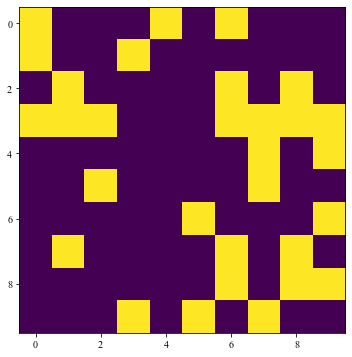

In [16]:
grid = generate_grid()
grid
tr = scipy.ndimage.rotate(grid,90)
plt.imshow(tr)

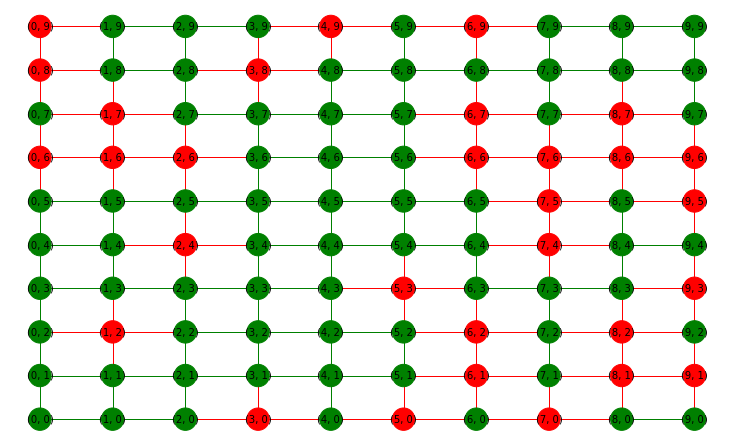

In [17]:
G = nx.grid_2d_graph(10, 10)
obstacles_list=np.argwhere(grid).tolist()
def dist(a, b):
    (x1, y1) = a
    (x2, y2) = b
    return ((x1 - x2) ** 2 + (y1 - y2) ** 2) ** 0.5
for (u, v) in G.edges():
    if list(v) in obstacles_list or list(u) in obstacles_list:        
        G.edges[u,v]['weight'] = 10000000
        G.edges[u,v]['color'] = 'red'
    else:
        G.edges[u,v]['weight'] = 0
        G.edges[u,v]['color'] = 'green'
adjacency_matrix=nx.to_numpy_matrix(G)
pos = dict( (n, n)  for n in G.nodes() )
color_map = []
for node in G:
    if list(node) in obstacles_list:
        color_map.append('red')
    else: 
        color_map.append('green')
        
colors = [G[u][v]['color'] for u,v in G.edges()]        
nx.draw(G, pos, node_size=500,  with_labels=True, node_color=color_map, width=1, edge_color=colors, font_size=10)

In [21]:
def astar_path_finding(G,start,end,dist):
    shortest_path=nx.astar_path(G,start,end,dist)
    print('Shortest path:')
    print(shortest_path)
    edges_path=[]
    for i in range (len(shortest_path)-1):
        edges_path.append((shortest_path[i], shortest_path[i+1]))
    
    color_map = []
    for node in G:
        if node==start or node==end:
            color_map.append('green')  
        elif node in shortest_path:
            color_map.append('blue')
        elif list(node) in obstacles_list:
            color_map.append('red')
        else: 
            color_map.append('grey')

    e_color_map = []
    for edge in G.edges():
        if edge in edges_path or (edge[1], edge[0]) in edges_path:
            e_color_map.append('green')
        else:
            e_color_map.append('w')

    nx.draw(G, pos, node_size=500,  with_labels=True, node_color=color_map, width=4, edge_color= e_color_map, font_size=9)

Shortest path:
[(0, 7), (1, 7), (2, 7), (3, 7), (4, 7), (5, 7), (5, 6), (5, 5), (6, 5), (6, 4), (6, 3), (7, 3), (8, 3)]


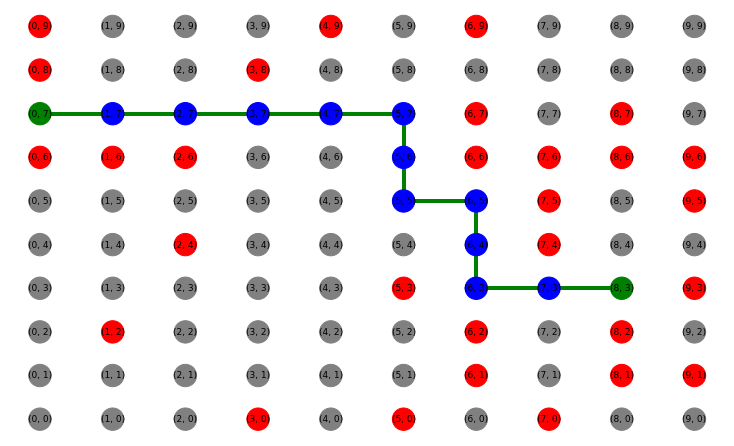

In [22]:
#1
start=(0,7)
end=(8,3)
astar_path_finding(G,start,end,dist)

Shortest path:
[(0, 0), (1, 0), (1, 1), (2, 1), (2, 2), (3, 2), (3, 3), (4, 3), (4, 4), (5, 4), (5, 5), (5, 6), (5, 7), (5, 8), (6, 8), (7, 8), (8, 8), (9, 8), (9, 9)]


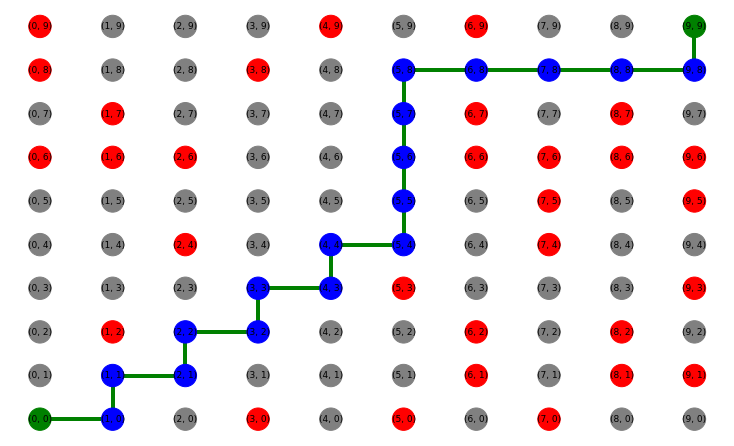

In [23]:
#2
start=(0,0)
end=(9,9)
astar_path_finding(G,start,end,dist)

Shortest path:
[(3, 1), (2, 1), (1, 1), (0, 1), (0, 2), (0, 3)]


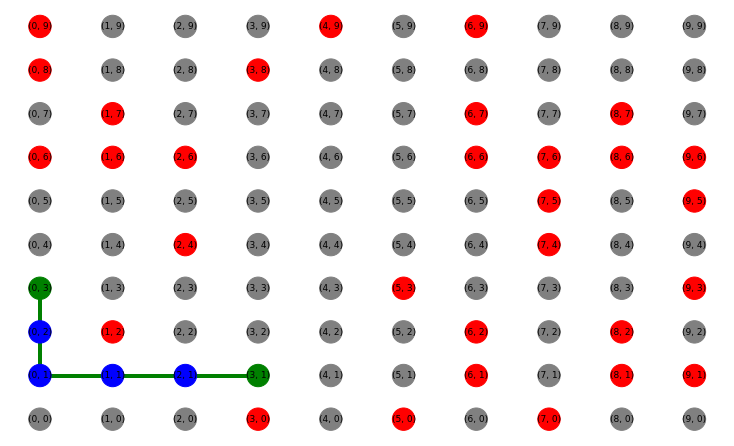

In [25]:
#3
start=(3,1)
end=(0,3)
astar_path_finding(G,start,end,dist)

Shortest path:
[(5, 2), (4, 2), (4, 3), (4, 4), (5, 4), (5, 5), (5, 6), (5, 7), (5, 8), (6, 8), (7, 8), (8, 8)]


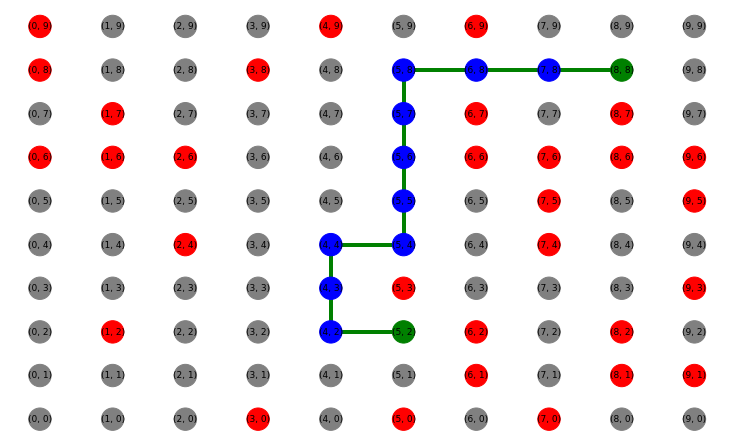

In [26]:
#4
start=(5,2)
end=(8,8)
astar_path_finding(G,start,end,dist)

Shortest path:
[(9, 4), (8, 4), (8, 3), (7, 3), (6, 3), (6, 4), (5, 4), (4, 4), (4, 3), (4, 2), (3, 2), (3, 1), (2, 1), (2, 0)]


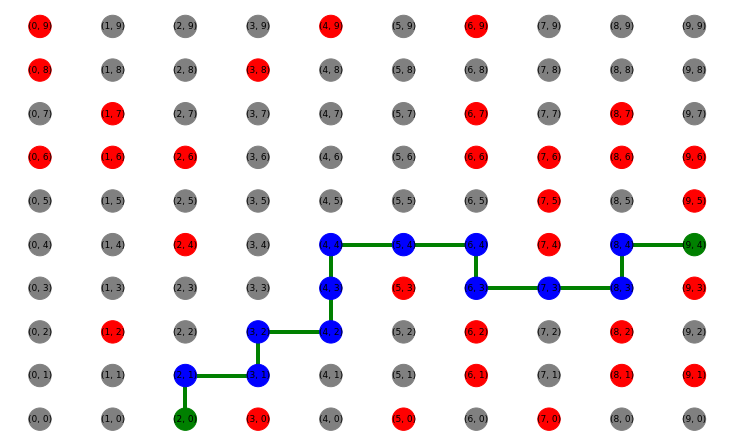

In [28]:
start=(9,4)
end=(2,0)
astar_path_finding(G,start,end,dist)